<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Import." data-toc-modified-id="Data-Import.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Import.</a></span></li><li><span><a href="#Data-Preprocessing." data-toc-modified-id="Data-Preprocessing.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing.</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)." data-toc-modified-id="Exploratory-Data-Analysis-(EDA).-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA).</a></span><ul class="toc-item"><li><span><a href="#Track-Duration." data-toc-modified-id="Track-Duration.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Track Duration.</a></span></li><li><span><a href="#Correlation-analysis." data-toc-modified-id="Correlation-analysis.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Correlation analysis.</a></span></li><li><span><a href="#Analysis-of-the-relationships-between-pairs-of-features-with-high-correlation." data-toc-modified-id="Analysis-of-the-relationships-between-pairs-of-features-with-high-correlation.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Analysis of the relationships between pairs of features with high correlation.</a></span></li></ul></li><li><span><a href="#Features-Engineering." data-toc-modified-id="Features-Engineering.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Features Engineering.</a></span></li><li><span><a href="#Features-Selection-and-Train-Data-Split." data-toc-modified-id="Features-Selection-and-Train-Data-Split.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Features Selection and Train Data Split.</a></span><ul class="toc-item"><li><span><a href="#Features-selection." data-toc-modified-id="Features-selection.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Features selection.</a></span></li><li><span><a href="#Train-data-split." data-toc-modified-id="Train-data-split.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Train data split.</a></span></li></ul></li><li><span><a href="#Models-Training." data-toc-modified-id="Models-Training.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Models Training.</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression." data-toc-modified-id="LogisticRegression.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>LogisticRegression.</a></span></li><li><span><a href="#KNeighborsClassifier." data-toc-modified-id="KNeighborsClassifier.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>KNeighborsClassifier.</a></span></li><li><span><a href="#RandomForestClassifier." data-toc-modified-id="RandomForestClassifier.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>RandomForestClassifier.</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#Hyperparameters-tuning." data-toc-modified-id="Hyperparameters-tuning.-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Hyperparameters tuning.</a></span></li></ul></li><li><span><a href="#Model-Performance-Evaluation." data-toc-modified-id="Model-Performance-Evaluation.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Performance Evaluation.</a></span></li><li><span><a href="#Feature-Importance-Analysis." data-toc-modified-id="Feature-Importance-Analysis.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature Importance Analysis.</a></span></li><li><span><a href="#Running-the-Best-Model-on-Test-Data." data-toc-modified-id="Running-the-Best-Model-on-Test-Data.-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Running the Best Model on Test Data.</a></span><ul class="toc-item"><li><span><a href="#Training-the-best-model-on-the-entire-training-dataset." data-toc-modified-id="Training-the-best-model-on-the-entire-training-dataset.-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Training the best model on the entire training dataset.</a></span></li><li><span><a href="#Predictions-on-the-test-dataset." data-toc-modified-id="Predictions-on-the-test-dataset.-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Predictions on the test dataset.</a></span></li><li><span><a href="#Creating-a-submission-file-for-upload-to-the-Kaggle.com-platform" data-toc-modified-id="Creating-a-submission-file-for-upload-to-the-Kaggle.com-platform-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Creating a submission file for upload to the Kaggle.com platform</a></span></li></ul></li><li><span><a href="#General-Conclusions." data-toc-modified-id="General-Conclusions.-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>General Conclusions.</a></span></li></ul></div>

# Music genre prediction.

This project aims to improve the recommendation system of the popular music streaming platform "MiFaSol".

The primary objective of this project is to create a model that predicts the music genre of a track based on its features. This will enable the platform to provide users with relevant recommendations based on their preferences.

Supervised learning techniques will be employed to solve the multi-classification task.

**Data Description.**

There are two datasets, a training dataset and a test dataset, which contain tracks features. The target column is `music_genre`.

**Work Plan:**

* Data Import.

* Data Preprocessing.

* Exploratory Data Analysis (EDA).

* Features Engineering.

* Features Selection.

* Models Training:
  
    * LogisticRegression  
    
    * KNeighborsClassifier
        
    * RandomForestClassifier

    * CatBoostClassifier

* Model Performance Evaluation.

* Feature Importance Analysis.

* Running the Best Model on Test Data.

* General Conclusions.


The application of the model developed in this project will improve the quality of personalized recommendations for users, leading to increased user satisfaction and engagement with the service. This will also help to expand the service's reach by attracting new artists and musicians to the platform.

## Data Import.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv
import phik
import optuna
from optuna.samplers import TPESampler

from catboost import CatBoostClassifier, Pool, cv
from catboost.utils import get_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    PowerTransformer, 
    StandardScaler
)

from sklearn.model_selection import (
    cross_val_score, 
    StratifiedKFold
)

from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder
)

from sklearn.dummy import DummyClassifier
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
#warnings.filterwarnings('ignore')

In [3]:
RANDOM_STATE = 12345
TEST_SIZE = 0.2

Let's read the train data and display the top 5 rows.

In [4]:
df_train = pd.read_csv('kaggle_music_genre_train.csv')
df_train.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,"25,143.00",Highwayman,0.48,0.67,"182,653.00",0.35,0.02,D,0.12,-16.84,Major,0.05,101.38,4-Apr,0.45,Country
1,"26,091.00",Toes Across The Floor,0.24,0.45,"187,133.00",0.67,0.00,A,0.11,-8.39,Minor,0.04,113.07,4-Apr,0.54,Rock
2,"87,888.00",First Person on Earth,0.23,0.45,"173,448.00",0.80,0.00,E,0.18,-5.22,Minor,0.37,80.98,4-Apr,0.34,Alternative
3,"77,021.00",No Te Veo - Digital Single,0.06,0.85,"255,987.00",0.87,0.00,G#,0.33,-4.80,Minor,0.08,116.01,4-Apr,0.97,Hip-Hop
4,"20,852.00",Chasing Shadows,0.23,0.74,"195,333.00",0.57,0.00,C,0.18,-5.55,Major,0.05,76.49,4-Apr,0.58,Alternative


Let's read the test data and display the top 5 rows.

In [5]:
df_test = pd.read_csv('kaggle_music_genre_test.csv')
df_test.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.30,0.76,"146,213.00",0.68,0.00,A#,0.30,-7.14,Minor,0.36,90.36,4-Apr,0.90
1,72394,The Hunter,0.54,0.26,"240,360.00",0.52,0.01,G#,0.08,-5.17,Major,0.03,78.39,4-Apr,0.32
2,88081,Hate Me Now,0.01,0.68,"284,000.00",0.77,0.00,A,0.11,-4.40,Minor,0.22,90.00,4-Apr,0.41
3,78331,Somebody Ain't You,0.02,0.59,"177,354.00",0.75,0.00,B,0.12,-4.60,Major,0.05,160.05,4-Apr,0.61
4,72636,Sour Mango,0.00,0.42,-1.00,0.45,0.01,D,0.04,-8.83,Major,0.20,73.83,4-Apr,0.12


Checking data type of all the columns in the datasets

In [6]:
df_train.dtypes

instance_id         float64
track_name           object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [7]:
df_test.dtypes

instance_id           int64
track_name           object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
obtained_date        object
valence             float64
dtype: object

Let's conduct a comparative data analysis using the Sweet Viz library.

In [8]:
music_report = sv.compare([df_train, 'Train Data'],[df_test, 'Test Data'])

                                             |          | [  0%]   00:00 -> (? left)

In [9]:
music_report.show_html('music_report.html')

Report music_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


[Open report](file:///C:/Users/daimy/Projects/work_shop/music_genre_classification/music_report.html)

**Conclusions:**

* The data provided for analysis consists of two files: training and test datasets. The target feature has been removed from the test dataset. The prediction results for this dataset will be used to evaluate the model's performance on the Kaggle platform.

* The training dataset consists of 20394 rows and 16 columns, while the test dataset consists of 5099 rows and 15 columns.

* No duplicates were found.

* The data consists of 11 numerical features, 3 categorical features (one of which represents the track's upload date to the service), and 1 text feature (track name).

* The distribution of the features in both datasets is identical. `Danceability`, `tempo`, and `valence` all follow a normal distribution.

* The columns `key`, `mode`, and `tempo` contain missing values in both tables.

* The `instance_id` column consists entirely of unique values in both dataframes and can be used as indices for the tables.

* The target has 10 classes. The classes are imbalanced.

* The columns with the strongest correlation coefficients to the target are `loudness`, `acousticness`, `danceability`, `instrumentalness`, and `energy`.

* The `duration_ms` column in both datasets contains -1 for 10% of its values. This could be a placeholder for missing data. This column also shows the presence of outliers.

* According to the data in the `instrumentalness` column, about 70% of tracks in both datasets are vocal.

* Approximately 70% of values in the `liveness` column in both dataframes range from 0 to 0.2, indicating studio tracks.

* About 80% of values in the `loudness` column in both datasets range from -10 to 0 dB.

* Over 80% of values in the `speechiness` column in both dataframes range from 0 to 0.2, indicating that these tracks are likely music and other non-speech tracks.

* The `obtained_date` column in both tables consists of 4 unique values, 90% of which are April 4th. This column is not useful for machine learning.

* According to the train data, the most popular musical genre is Blues, while Hip-hop is the least popular.


## Data Preprocessing.

Let's change  data type in `instance_id` to `int32` and set it as the indices for the dataframes.

In [10]:
df_train['instance_id'] = df_train['instance_id'].astype('int32')

In [11]:
df_train = df_train.set_index('instance_id')
df_train.head()

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,
25143,Highwayman,0.48,0.67,"182,653.00",0.35,0.02,D,0.12,-16.84,Major,0.05,101.38,4-Apr,0.45,Country
26091,Toes Across The Floor,0.24,0.45,"187,133.00",0.67,0.00,A,0.11,-8.39,Minor,0.04,113.07,4-Apr,0.54,Rock
87888,First Person on Earth,0.23,0.45,"173,448.00",0.80,0.00,E,0.18,-5.22,Minor,0.37,80.98,4-Apr,0.34,Alternative
77021,No Te Veo - Digital Single,0.06,0.85,"255,987.00",0.87,0.00,G#,0.33,-4.80,Minor,0.08,116.01,4-Apr,0.97,Hip-Hop
20852,Chasing Shadows,0.23,0.74,"195,333.00",0.57,0.00,C,0.18,-5.55,Major,0.05,76.49,4-Apr,0.58,Alternative


In [12]:
df_test['instance_id'] = df_test['instance_id'].astype('int32')

In [13]:
df_test = df_test.set_index('instance_id')
df_test.head()

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
instance_id,,,,,,,,,,,,,,
48564,Low Class Conspiracy,0.30,0.76,"146,213.00",0.68,0.00,A#,0.30,-7.14,Minor,0.36,90.36,4-Apr,0.90
72394,The Hunter,0.54,0.26,"240,360.00",0.52,0.01,G#,0.08,-5.17,Major,0.03,78.39,4-Apr,0.32
88081,Hate Me Now,0.01,0.68,"284,000.00",0.77,0.00,A,0.11,-4.40,Minor,0.22,90.00,4-Apr,0.41
78331,Somebody Ain't You,0.02,0.59,"177,354.00",0.75,0.00,B,0.12,-4.60,Major,0.05,160.05,4-Apr,0.61
72636,Sour Mango,0.00,0.42,-1.00,0.45,0.01,D,0.04,-8.83,Major,0.20,73.83,4-Apr,0.12


Next only the data from the training dataset will be processed.

The columns `track_name` and `obtained_date` may generate implicit duplicates. They should be removed.

In [14]:
data = df_train.drop(['track_name', 'obtained_date'], axis=1).copy()
data.sample(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
instance_id,,,,,,,,,,,,,
25352,0.03,0.36,"213,827.00",0.89,0.00,G,0.34,-5.01,Major,0.10,81.44,0.43,Rock
55976,0.01,0.78,"118,393.00",0.55,0.25,G,0.10,-6.42,Major,0.03,104.01,0.63,Alternative
42862,0.33,0.61,"168,947.00",0.39,0.00,A,0.24,-10.69,Minor,0.07,126.00,0.21,Rap
56919,0.20,0.87,"251,989.00",0.46,0.00,E,0.09,-8.34,Major,0.18,112.97,0.46,Rap
46128,0.94,0.40,"291,267.00",0.21,0.00,F,0.20,-17.83,Major,0.03,96.96,0.33,Alternative


Let's check for duplicates.

In [15]:
data.duplicated().sum()

7

There are 7 duplicate rows. It is likely that the same tracks were added multiple times to the service, but with different names or dates. These duplicate tracks should be removed.

In [16]:
data = data.drop_duplicates()

In [17]:
data.duplicated().sum()

0

Missing values will be handled in section 6 of the project.

Let's optimize the memory usage.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20387 entries, 25143 to 86375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20387 non-null  float64
 1   danceability      20387 non-null  float64
 2   duration_ms       20387 non-null  float64
 3   energy            20387 non-null  float64
 4   instrumentalness  20387 non-null  float64
 5   key               19653 non-null  object 
 6   liveness          20387 non-null  float64
 7   loudness          20387 non-null  float64
 8   mode              19881 non-null  object 
 9   speechiness       20387 non-null  float64
 10  tempo             19945 non-null  float64
 11  valence           20387 non-null  float64
 12  music_genre       20387 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.1+ MB


In [19]:
def reduce_memory_usage(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type == "float64":
            c_min = df[col].min()
            c_max = df[col].max()
            
            if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
        
        else:
            df[col] = df[col].astype("category")
        
    
    end_mem = df.memory_usage().sum() / 1024 ** 2
    
    if verbose:
        print("Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
            end_mem, 100 * (start_mem - end_mem) / start_mem
        ))
    
    return df

In [20]:
data = reduce_memory_usage(data)

Mem. usage decreased to 0.91 Mb (56.4% reduction)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20387 entries, 25143 to 86375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   acousticness      20387 non-null  float32 
 1   danceability      20387 non-null  float32 
 2   duration_ms       20387 non-null  float32 
 3   energy            20387 non-null  float32 
 4   instrumentalness  20387 non-null  float32 
 5   key               19653 non-null  category
 6   liveness          20387 non-null  float32 
 7   loudness          20387 non-null  float32 
 8   mode              19881 non-null  category
 9   speechiness       20387 non-null  float32 
 10  tempo             19945 non-null  float32 
 11  valence           20387 non-null  float32 
 12  music_genre       20387 non-null  category
dtypes: category(3), float32(10)
memory usage: 936.6 KB


**Conclusions:**

* The `instance_id` column was set as the index in both tables.

* The `track_name` and `obtained_date` columns were removed from the training dataset.

* Seven duplicate rows were found and removed from the train data.

* Data type conversion reduced memory usage by 54.4%.

## Exploratory Data Analysis (EDA).

### Track Duration.

Let's take a look at the outliers in the `duration_ms` column.

In [22]:
(data['duration_ms']/60000).describe()

count   20,387.00
mean         3.67
std          2.11
min         -0.00
25%          2.96
50%          3.66
75%          4.43
max         74.97
Name: duration_ms, dtype: float64

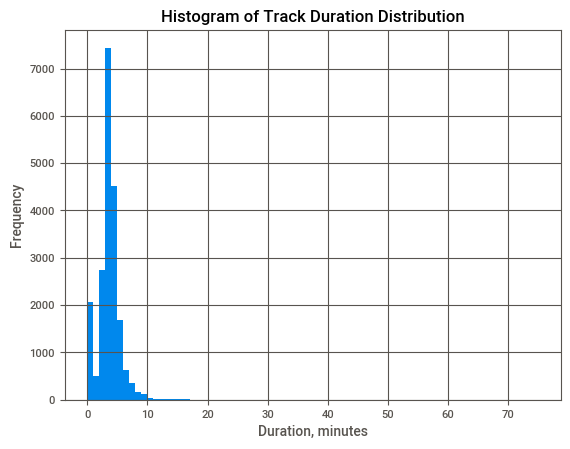

In [23]:
(data['duration_ms']/60000).hist(bins=75)
plt.title('Histogram of Track Duration Distribution')
plt.xlabel('Duration, minutes')
plt.ylabel('Frequency')
plt.show()

Let's build a histogram for tracks with a duration of 15 minutes or more.

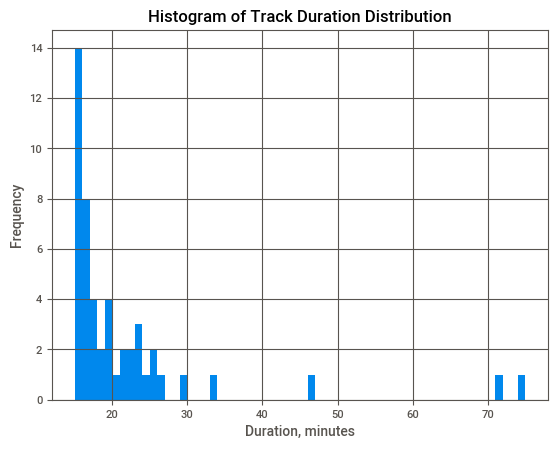

In [24]:
(data['duration_ms']/60000).hist(bins=60, range=(15,75))
plt.title('Histogram of Track Duration Distribution')
plt.xlabel('Duration, minutes')
plt.ylabel('Frequency')
plt.show()

Let's see how many tracks longer than 15 minutes there are in each genre. 

In [25]:
data[['music_genre', 'duration_ms']].loc[data['duration_ms']>15*60000].groupby(by='music_genre')['duration_ms'].count()

C:\Users\daimy\AppData\Local\Temp\ipykernel_26124\16463732.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[['music_genre', 'duration_ms']].loc[data['duration_ms']>15*60000].groupby(by='music_genre')['duration_ms'].count()


music_genre
Alternative     0
Anime           1
Blues           8
Classical      31
Country         0
Electronic      6
Hip-Hop         0
Jazz            3
Rap             0
Rock            0
Name: duration_ms, dtype: int64

Among tracks with abnormally long durations, classical music is the most frequently encountered genre. This result is quite appropriate for this genre, as classical compositions with durations of 15-20 minutes are common, and depending on the performance, they can last several hours. For example, Rachmaninoff's Piano Concerto No. 3 in D Minor lasts about 50 minutes, while Beethoven's Missa Solemnis lasts about 80-90 minutes and Bach's Mass in B Minor lasts about 110-120 minutes.

### Correlation analysis.

Let's calculate a correlation matrix that contains the pair-wise 𝜙k coefficients and plot a heatmap.

In [26]:
phik_overview = data.phik_matrix()

interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


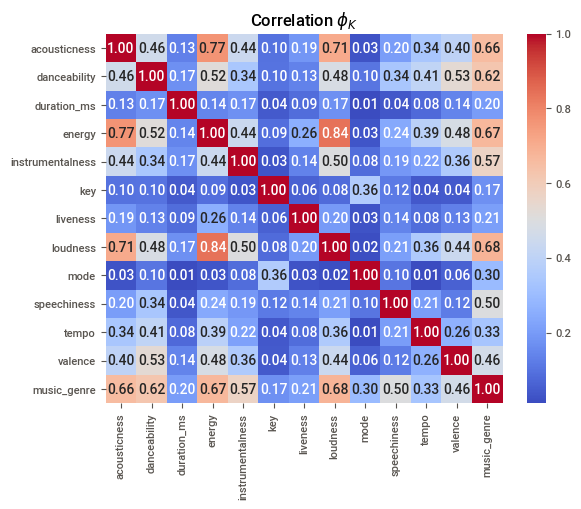

In [27]:
sns.heatmap(phik_overview, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation $\phi_K$')
plt.show()

Pairs of features with a strong correlation:

`acousticness` - `loudness`

`acousticness` - `energy`

`energy` - `loudness`

In [28]:
phik_target = phik_overview['music_genre'].sort_values(ascending=False)
phik_target

music_genre        1.00
loudness           0.68
energy             0.67
acousticness       0.66
danceability       0.62
instrumentalness   0.57
speechiness        0.50
valence            0.46
tempo              0.33
mode               0.30
liveness           0.21
duration_ms        0.20
key                0.17
Name: music_genre, dtype: float64

Features with a strong correlation to the target:

* `loudness`

* `energy`

* `acousticness`

* `danceability`

* `instrumentalness`

Let's define functions to create a pivot table and visualize the distribution of feature values by music genre.

In [29]:
def aggregate_feature_by_genre(column, observed=False):
    """
    Aggregates data by the 'music_genre' feature for a specified column in the DataFrame.
    
    Parameters:
    - column (str): The name of the column to aggregate.
    - observed (bool): Whether to include only observed values in the result. Default is False.
    
    Returns:
    - pandas.DataFrame: A DataFrame with aggregation results, including count, mean, minimum, and maximum values,
                        sorted by the mean value in descending order.
    """
    # Group by 'music_genre' and aggregate the specified column
    aggregated_data = (data
                       .groupby('music_genre', observed=observed)[column]
                       .agg(['count', 'mean', 'min', 'max'])
                       .sort_values(by='mean', ascending=False))
    
    return aggregated_data

In [30]:
def plot_feature_distribution(column, title):
    """
    Plots a scatter plot of the specified column against 'music_genre' in the DataFrame.
    
    Parameters:
    - column (str): The name of the column to plot.
    - title (str): The title of the plot.
    """
    # Create the scatter plot
    plt.figure(figsize=(12, 6))
    plt.scatter(data['music_genre'], data[column], alpha=0.5, edgecolor='w', s=50)
    plt.title(title)
    plt.xlabel('Music Genre')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout() 
    plt.show()

Let's explore the feature `loudness`.

In [31]:
aggregate_feature_by_genre('loudness')

,count,mean,min,max
music_genre,,,,
Alternative,2601,-6.56,-20.74,-0.26
Rap,2427,-6.65,-22.59,-1.02
Hip-Hop,1145,-6.84,-25.60,-0.67
Electronic,2559,-7.00,-24.80,1.59
Rock,2165,-7.30,-26.40,-0.76
Country,2120,-7.33,-27.12,-1.53
Anime,1901,-7.79,-38.83,0.36
Blues,2857,-8.96,-30.80,3.74
Jazz,1239,-11.33,-29.71,-1.16


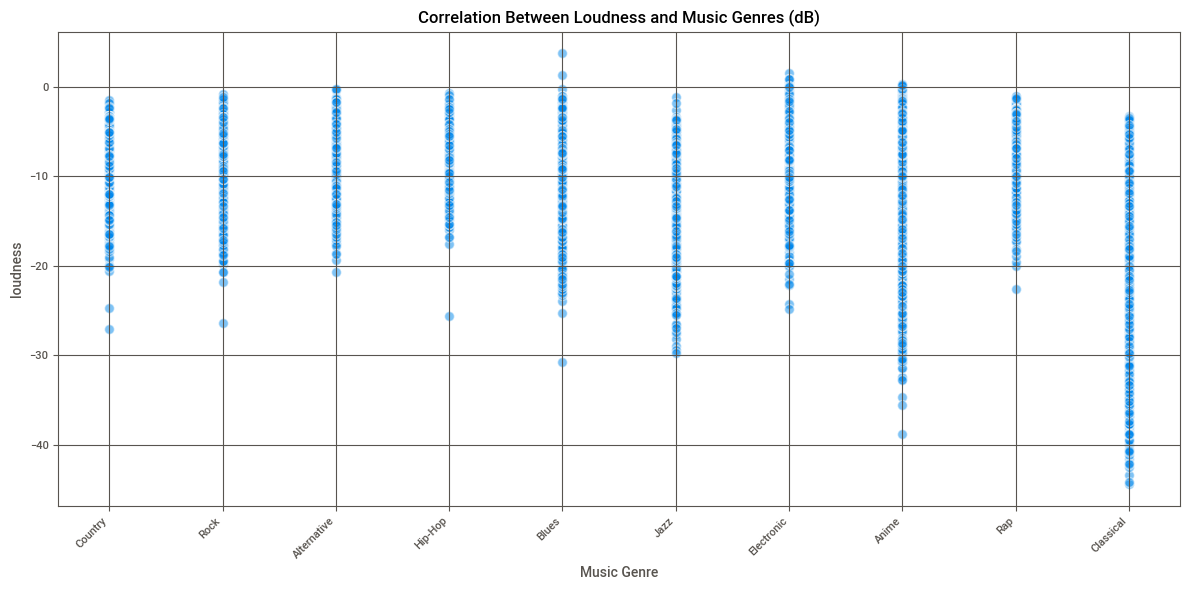

In [32]:
plot_feature_distribution('loudness', 'Correlation Between Loudness and Music Genres (dB)')

The genres Alternative, Rap, and Hip-Hop tend to have the highest average loudness levels, while Jazz and Classical - the lowest. 

Classical music has the lowest loudness, while Blues has the highest.

Let's explore the feature `energy`.

In [33]:
aggregate_feature_by_genre('energy')

,count,mean,min,max
music_genre,,,,
Electronic,2559,0.74,0.02,1.00
Alternative,2601,0.71,0.06,1.00
Rock,2165,0.68,0.02,1.00
Anime,1901,0.68,0.00,1.00
Rap,2427,0.65,0.08,1.00
Hip-Hop,1145,0.64,0.20,1.00
Country,2120,0.64,0.04,0.98
Blues,2857,0.61,0.01,1.00
Jazz,1239,0.47,0.01,0.99


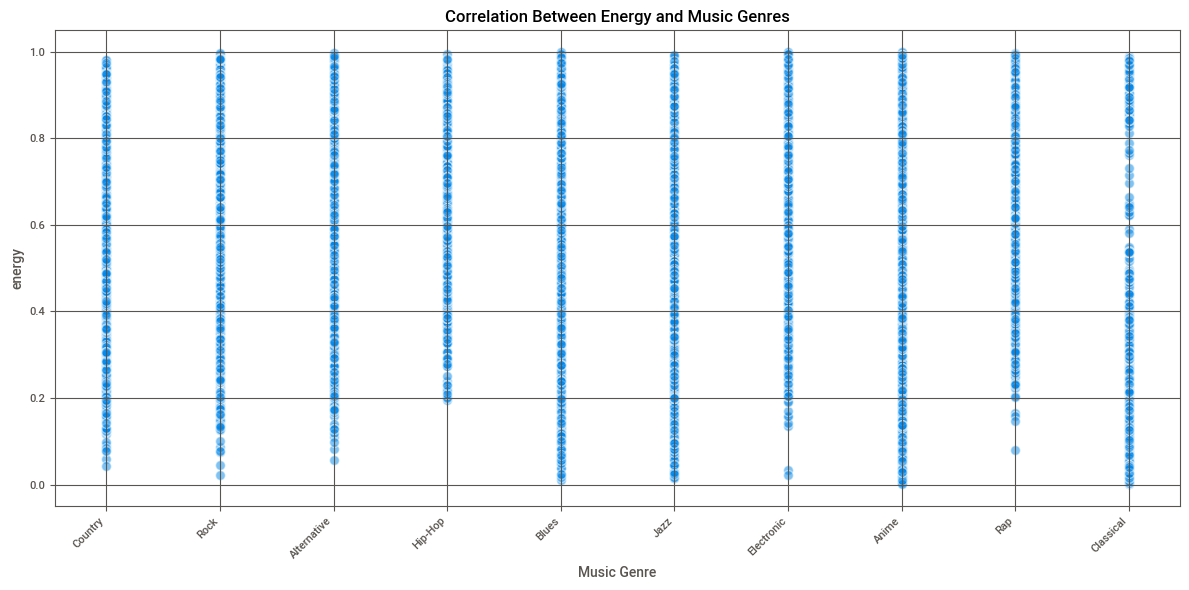

In [34]:
plot_feature_distribution('energy', 'Correlation Between Energy and Music Genres')

The genres Electronic and Alternative tend to have the highest average energy levels, while Jazz and Classical - the lowest. 

Classical music has the lowest energy level, while Electronic and Anime have the highest.

Let's explore the feature `acousticness`.

In [35]:
aggregate_feature_by_genre('acousticness')

,count,mean,min,max
music_genre,,,,
Classical,1373,0.88,0.00,1.00
Jazz,1239,0.50,0.00,1.00
Blues,2857,0.31,0.00,1.00
Country,2120,0.28,0.00,0.97
Anime,1901,0.27,0.00,1.00
Rock,2165,0.20,0.00,0.99
Hip-Hop,1145,0.18,0.00,0.95
Rap,2427,0.17,0.00,0.94
Alternative,2601,0.17,0.00,0.98


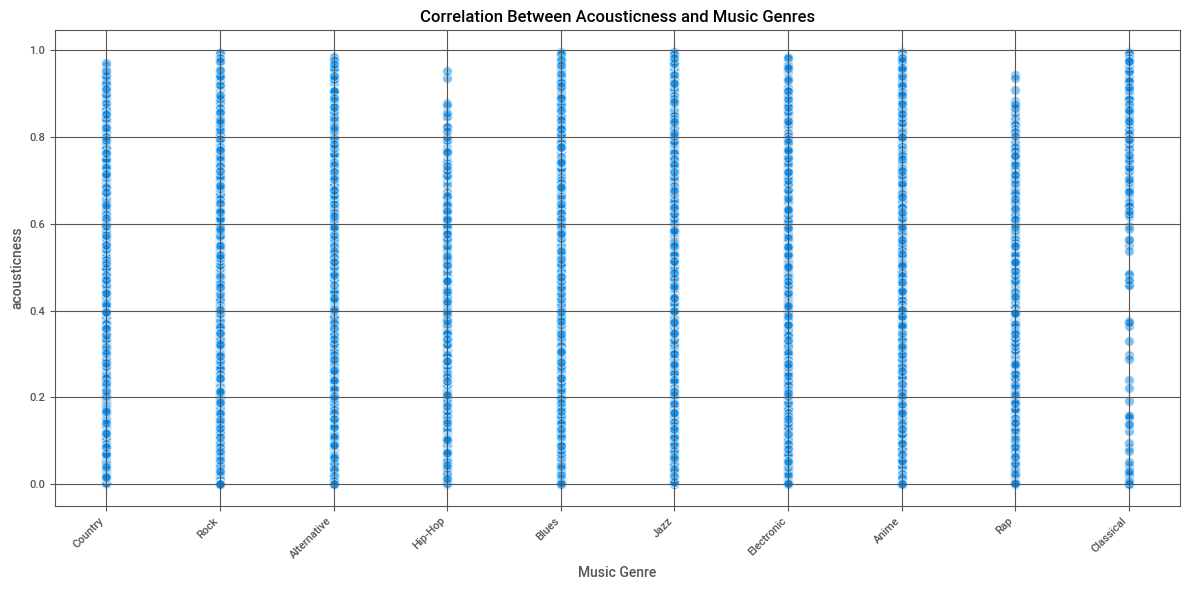

In [36]:
plot_feature_distribution('acousticness', 'Correlation Between Acousticness and Music Genres')

Classical music has the hightest average acousticness level, which is 0.88. For all other genres, the average acousticness level is lower than 0.5.

Let's explore the feature `danceability`.

In [37]:
aggregate_feature_by_genre('danceability')

,count,mean,min,max
music_genre,,,,
Hip-Hop,1145,0.72,0.28,0.98
Rap,2427,0.70,0.20,0.98
Electronic,2559,0.62,0.08,0.97
Jazz,1239,0.58,0.06,0.95
Country,2120,0.58,0.20,0.95
Alternative,2601,0.55,0.10,0.95
Rock,2165,0.54,0.08,0.88
Blues,2857,0.53,0.12,0.95
Anime,1901,0.47,0.06,0.89


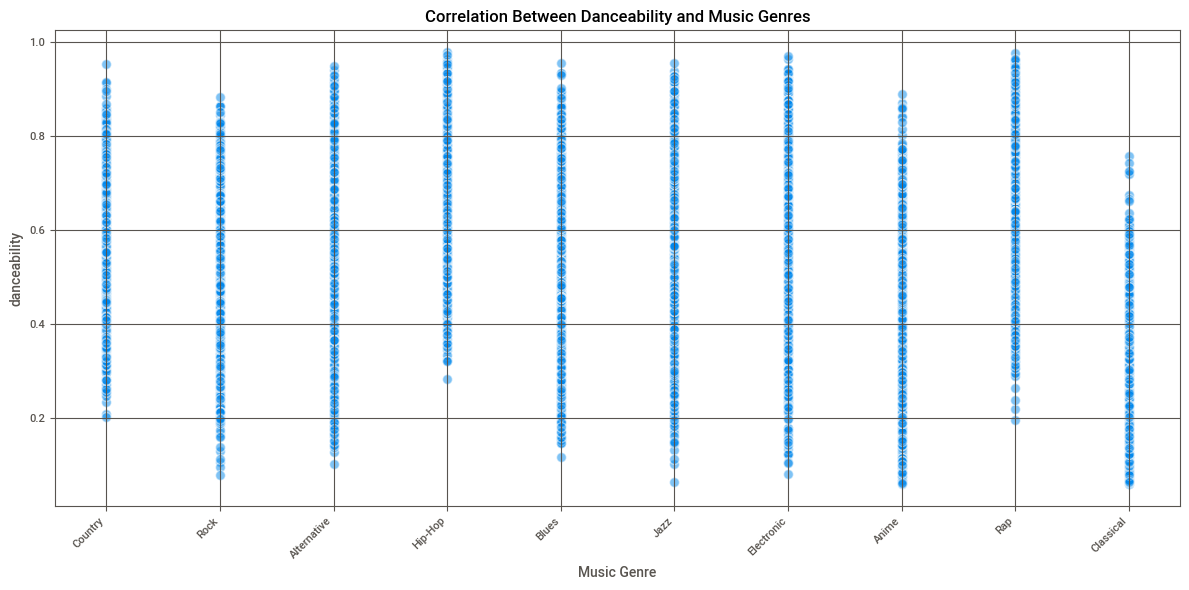

In [38]:
plot_feature_distribution('danceability', 'Correlation Between Danceability and Music Genres')

The most danceable genres are Hip-Hop, Rap, and Electronic music. On the other hand, Anime and Classical music are considered the least danceable genres.

Let's explore the feature `instrumentalness`.

In [39]:
aggregate_feature_by_genre('instrumentalness')

,count,mean,min,max
music_genre,,,,
Classical,1373,0.60,0.00,0.99
Jazz,1239,0.36,0.00,0.98
Electronic,2559,0.35,0.00,0.99
Anime,1901,0.27,0.00,1.00
Blues,2857,0.09,0.00,0.96
Alternative,2601,0.06,0.00,0.94
Rock,2165,0.06,0.00,0.97
Hip-Hop,1145,0.01,0.00,0.92
Rap,2427,0.01,0.00,0.92


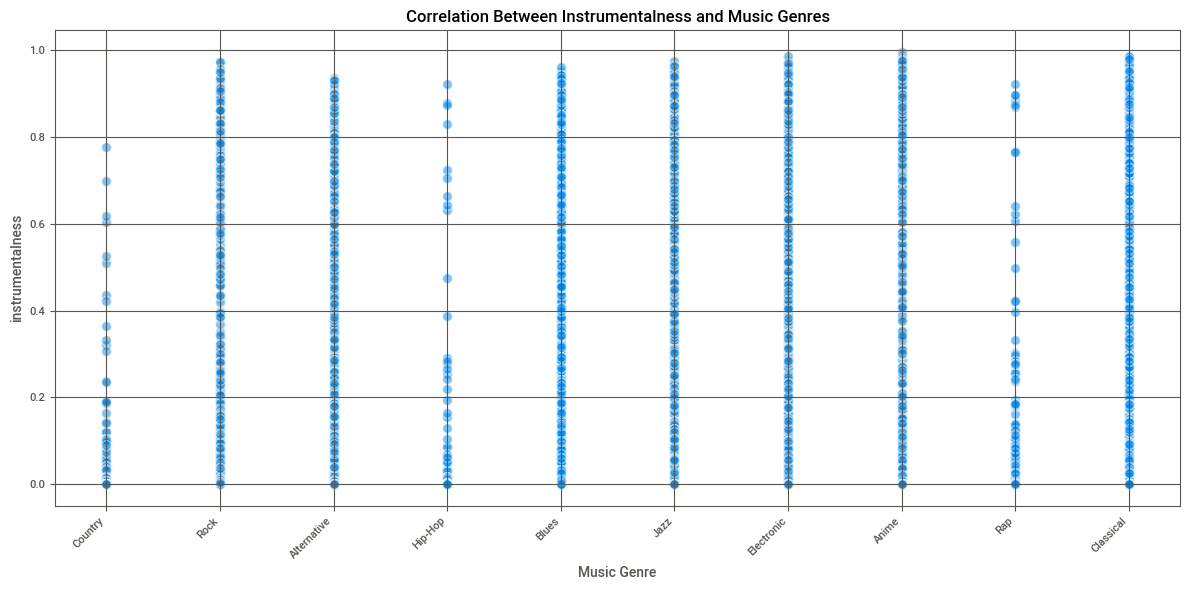

In [40]:
plot_feature_distribution('instrumentalness', 'Correlation Between Instrumentalness and Music Genres')

Classical music is predominantly instrumental, while Hip-Hop, Rap, and Country are mostly vocal.

In [41]:
columns = phik_target.index[1:6].tolist()
data.pivot_table(values=columns, index='music_genre', aggfunc='mean', observed=False)

,acousticness,danceability,energy,instrumentalness,loudness
music_genre,,,,,
Alternative,0.17,0.55,0.71,0.06,-6.56
Anime,0.27,0.47,0.68,0.27,-7.79
Blues,0.31,0.53,0.61,0.09,-8.96
Classical,0.88,0.30,0.17,0.60,-21.60
Country,0.28,0.58,0.64,0.01,-7.33
Electronic,0.12,0.62,0.74,0.35,-7.00
Hip-Hop,0.18,0.72,0.64,0.01,-6.84
Jazz,0.50,0.58,0.47,0.36,-11.33
Rap,0.17,0.70,0.65,0.01,-6.65


Genres characteristics based on comparative analysis of average values of the most important features:

*Alternative:*

Non-acoustic, loud and energetic music.

*Anime:*

Average level across all features.

*Blues:*

Energetic vocal music.

*Classical:*

Energetic vocal music.

*Country:*

Loud vocal music.

*Electronic:*

Non-acoustic, loud, energetic and danceable music.

*Hip-Hop:*

Non-acoustic, loud, energetic, danceable and vocal music.

*Jazz:*

Relatively quiet music. Average level in other features.

*Rap:*

Non-acoustic, loud, energetic, danceable and vocal music.

*Rock:*

Non-acoustic, loud, energetic, vocal music.

### Analysis of the relationships between pairs of features with high correlation.

Let's define a function to visualize the relationships between a pair of features.

In [42]:
def plot_corr(column_1, column_2, title):
    """
    Plots a scatter plot with a regression line for two features.
    
    Parameters:
    - column_1 (str): The name of the column for x-axis values.
    - column_2 (str): The name of the column for y-axis values.
    - title (str): The title of the plot.
    """
    # Create the scatter plot with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=column_1, y=column_2, data=data, line_kws={"color": "red"}, scatter_kws={'alpha':0.5})
    plt.title(title)
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.grid(True)
    plt.tight_layout()  # Adjusts the plot to fit labels and title
    plt.show()

Let's display the relationships between track features. 

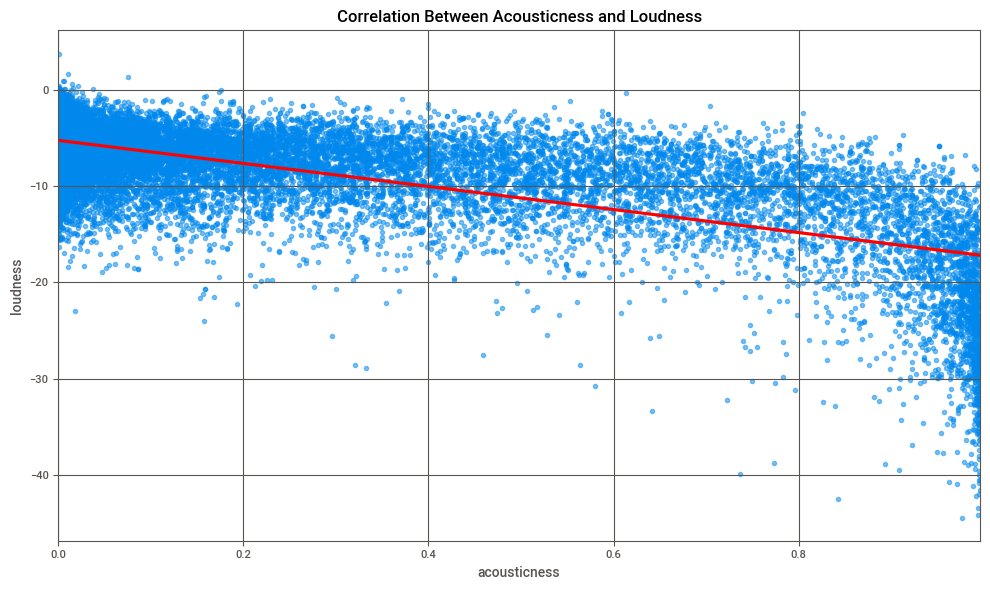

In [43]:
plot_corr('acousticness', 'loudness', 'Correlation Between Acousticness and Loudness')

There is an inverse relationship between loudness and acoustic.

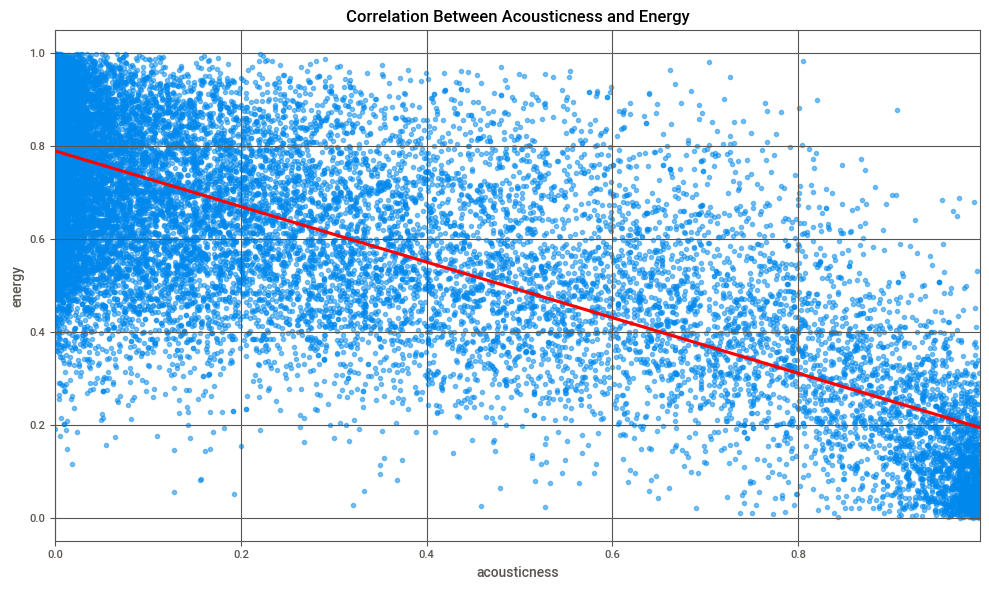

In [44]:
plot_corr('acousticness', 'energy', 'Correlation Between Acousticness and Energy')

A negative linear correlation is observed between acoustic and energy.

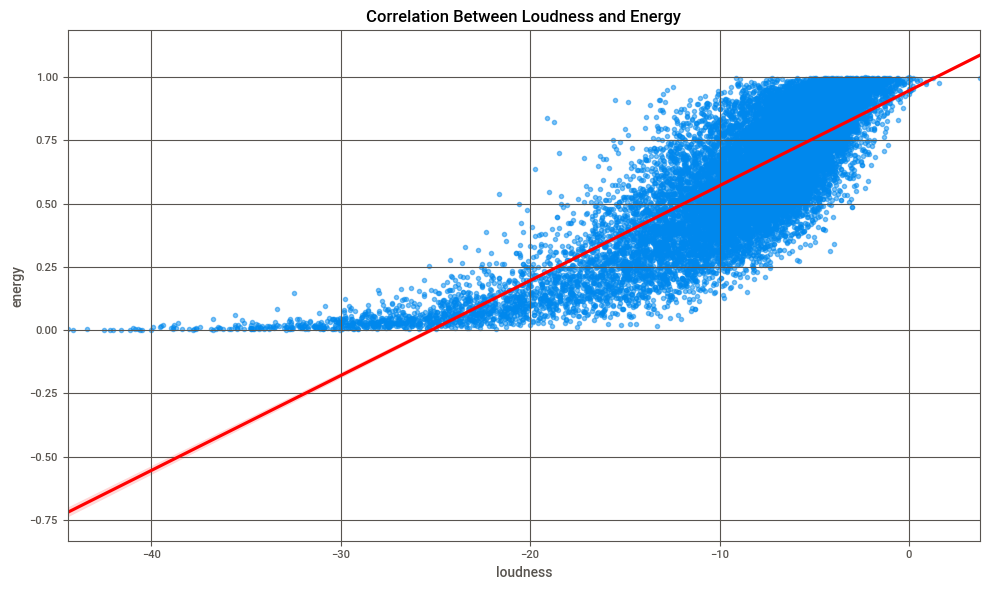

In [45]:
plot_corr('loudness', 'energy', 'Correlation Between Loudness and Energy')

There is a direct relationship between the loudness and energy.

**Conclusions:**

* There is multicollinearity among three features: acousticness, energy, and loudness.

* The `duration_ms` feature should be transformed into a categorical variable in order to deal with outliers.

## Features Engineering.

Let's group the data on the average track duration by music genre.

In [46]:
(data.groupby('music_genre')['duration_ms'].agg('mean')/60000).sort_values(ascending=False)

C:\Users\daimy\AppData\Local\Temp\ipykernel_26124\2216261733.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data.groupby('music_genre')['duration_ms'].agg('mean')/60000).sort_values(ascending=False)


music_genre
Classical     4.73
Electronic    4.08
Jazz          4.05
Blues         3.82
Rock          3.58
Anime         3.50
Alternative   3.48
Rap           3.26
Country       3.26
Hip-Hop       3.24
Name: duration_ms, dtype: float32

Based on the analysis of track duration, the following categories can be distinguished:

* Unknown duration: -1

* Very short tracks: 0 to 1 minute

* Short tracks: 1 to 3 minutes

* Medium tracks: 3 to 4 minutes

* Long tracks: 4 to 15 minutes

* Very long tracks: over 15 minutes

Let's define a function to categorize track durations based on the 5-point scale and add a new column to the DataFrame.

In [47]:
def duration_group_score(duration):
    """
    Assigns a score based on the track's duration.
    
    Parameters:
    - duration (float): The duration of the track in milliseconds.
    
    Returns:
    - int: The score corresponding to the duration category.
    """
    if duration == -1:
        return 0
    elif duration < 60000:
        return 1
    elif duration < 3 * 60000:
        return 2
    elif duration < 4 * 60000:
        return 3
    elif duration < 15 * 60000:
        return 4
    else:
        return 5  

In [48]:
data['duration_score'] = data['duration_ms'].apply(duration_group_score)
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,duration_score
instance_id,,,,,,,,,,,,,,
25143,0.48,0.67,"182,653.00",0.35,0.02,D,0.12,-16.84,Major,0.05,101.38,0.45,Country,3
26091,0.24,0.45,"187,133.00",0.67,0.00,A,0.11,-8.39,Minor,0.04,113.07,0.54,Rock,3
87888,0.23,0.45,"173,448.00",0.80,0.00,E,0.18,-5.22,Minor,0.37,80.98,0.34,Alternative,2
77021,0.06,0.85,"255,987.00",0.87,0.00,G#,0.32,-4.80,Minor,0.08,116.01,0.97,Hip-Hop,4
20852,0.23,0.74,"195,333.00",0.57,0.00,C,0.18,-5.55,Major,0.05,76.49,0.58,Alternative,3


In [49]:
data['duration_score'] = data['duration_score'].astype('int8')
data['duration_score'].dtype

dtype('int8')

In [50]:
interval_columns = data.select_dtypes(include='number').columns.difference(['duration_score'])
interval_columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [51]:
phik_overview = data.phik_matrix(interval_cols=interval_columns)

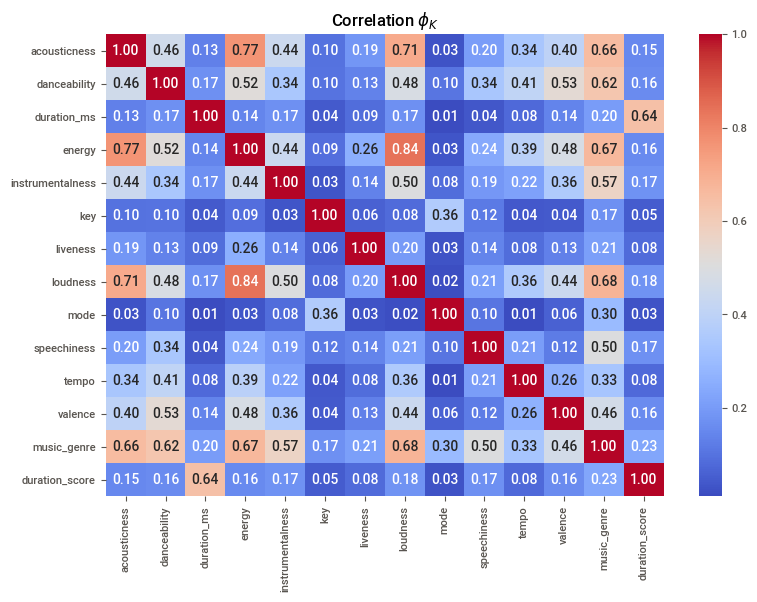

In [52]:
plt.figure(figsize=(9, 6))
sns.heatmap(phik_overview, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation $\phi_K$')
plt.show()

**Conclusion:**

A new synthetic feature has been added to the training dataset based on the length of a track. This has allowed to increase the correlation between the track duration and the target by 0.03.

## Features Selection and Train Data Split.

### Features selection.

Let's create subsets of features.

In [53]:
# target:
y = ['music_genre'] 

# features:
x_all = data.columns.difference(['music_genre', 'duration_ms'])

# categorical features:
x_cat = list(data.select_dtypes(include='category').columns.difference(y)) + ['duration_score']

# numeric features :
x_num = x_all.difference(x_cat)

# numeric features that follow a normal distribution.:
x_num_normal = ['danceability', 'tempo', 'valence']

# numeric features that follow a skewed distribution
x_num_skewed = x_num.difference(x_num_normal)

In [54]:
x_cat

['key', 'mode', 'duration_score']

In [55]:
x_num

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [56]:
x_num_normal

['danceability', 'tempo', 'valence']

In [57]:
x_num_skewed

Index(['acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness'],
      dtype='object')

### Train data split.

Let's split the train data into train and test sets.

In [58]:
x_train, x_test, y_train, y_test =(
    train_test_split(data[x_all], data[y], test_size=TEST_SIZE, stratify=data[y],  random_state=RANDOM_STATE)
)

x_train.shape, x_test.shape

((16309, 12), (4078, 12))

Let's take a look at the proportions of the target classes in the samples.

In [59]:
unique_values, counts = np.unique(y_train, return_counts=True)
fractions = counts / len(y_train)

for value, fraction in zip(unique_values, fractions):
    print(f"Class {value}: {fraction:.2f}")

Class Alternative: 0.13
Class Anime: 0.09
Class Blues: 0.14
Class Classical: 0.07
Class Country: 0.10
Class Electronic: 0.13
Class Hip-Hop: 0.06
Class Jazz: 0.06
Class Rap: 0.12
Class Rock: 0.11


In [60]:
unique_values, counts = np.unique(y_test, return_counts=True)
fractions = counts / len(y_test)

for value, fraction in zip(unique_values, fractions):
    print(f"Class {value}: {fraction:.2f}")

Class Alternative: 0.13
Class Anime: 0.09
Class Blues: 0.14
Class Classical: 0.07
Class Country: 0.10
Class Electronic: 0.13
Class Hip-Hop: 0.06
Class Jazz: 0.06
Class Rap: 0.12
Class Rock: 0.11


The class shares are identical. 

Let's encode the target.

In [61]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())

**Выводы**:

* Был произведен отбор и классификация обучающих признаков.

* Выборка разделена на 2 части в соостношении 4:1

* Целевой признак закодирован.

**Conclusions:**

* Subsets of features have been created.

* The training data has been split into training and testing datasets

* The target has been encoded.

## Models Training.

Let's train several models and test their performance using cross-validation with 5-folds. To evaluate the quality of the predictions, the micro-averaged F1 score will be used.

### LogisticRegression.

For logistic regression, numerical features should be scaled and categorical features should be encoded.

In [62]:
# Handling categorical features
categorical_pipe = make_pipeline(
    OneHotEncoder(drop='first', sparse_output=False)
)

# Handling numerical features with normal distribution
numeric_pipe_1 = make_pipeline(StandardScaler())

# Handling numerical features with skewed distribution
numeric_pipe_2 = make_pipeline(PowerTransformer())

# Transformer for all features
full = ColumnTransformer(
    transformers=[
        ('categorical', categorical_pipe, x_cat),
        ('standardization', numeric_pipe_1, x_num_normal),
        ('power_transform', numeric_pipe_2, x_num_skewed)
    ]
)

# Pipeline
pipeline_1 = Pipeline(
    steps=[
        ('preprocess', full),
        ('imputer', IterativeImputer(random_state=RANDOM_STATE)),
        ('model_1', LogisticRegression(
            class_weight='balanced', solver='newton-cg', n_jobs=-1, random_state=RANDOM_STATE)
        )
    ]
)

In [63]:
# Create a stratified k-fold cross-validator with 5 folds
cv_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Evaluate the pipeline using cross-validation and compute the f1_micro score
scores_1 = cross_val_score(pipeline_1, x_train, y_train_encoded, cv=cv_5, scoring='f1_micro')

# Display the mean f1_micro score
print(f'Mean f1_micro score = {scores_1.mean():.2f}')

Mean f1_micro score = 0.37


### KNeighborsClassifier.

For KNeighborsClassifier, numerical features should be scaled and categorical features should be encoded.

In [64]:
pipeline_2 = Pipeline(
    steps=[
        ('preprocess', full),
        ('imputer', IterativeImputer(random_state=RANDOM_STATE)),
        ('model_2', KNeighborsClassifier(weights='distance', n_jobs=-1))
    ]
)

In [65]:
scores_2 = cross_val_score(pipeline_2, x_train, y_train_encoded, cv=cv_5, scoring='f1_micro')
print(f'Mean f1_micro score = {scores_2.mean():.2f}')

Mean f1_micro score = 0.36


### RandomForestClassifier.

For RandomForestClassifier, categorical features should be encoded, whereas numerical features may be left untransformed. However, this model often performs better with scaled numerical features.

In [66]:
pipeline_3 = Pipeline(
    steps=[
        ('preprocess', full),
        ('imputer', IterativeImputer(random_state=RANDOM_STATE)),
        ('model_3', RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE, n_jobs=-1))
    ]
)

In [67]:
scores_3 = cross_val_score(pipeline_3, x_train, y_train_encoded, cv=cv_5, scoring='f1_micro')
print(f'Mean f1_micro score = {scores_3.mean():.2f}')

Mean f1_micro score = 0.45


### CatBoostClassifier

CatBoostClassifier is capable of handling categorical and numerical features directly, without the need for encoding or scaling.  It can handle missing numerical values, but missing categorical values should be replaced with a space. The algorithm also supports text features.

Let's define a function to prepare the data for CatBoostClassifier.

In [68]:
def data_preparation(x_data, category, df):
    """
    Fills missing values in categorical data with a space and adds a column with track names.

    Parameters:
    - x_data (pd.DataFrame): The input dataframe.
    - category (list of str): The names of categorical columns.
    - df (pd.DataFrame): The dataframe containing the 'track_name' column.

    Returns:
    - pd.DataFrame: The modified dataframe.
    """
    # Make a copy of the input dataframe to avoid modifying the original data
    x_df = x_data.copy()

    # Fill missing values in the categorical columns with spaces
    for col in category:
        if col in x_df.columns and isinstance(x_df[col].dtype, pd.CategoricalDtype):
            # Add a new category for the space
            x_df[col] = x_df[col].cat.add_categories(' ')
        
    x_df[category] = x_df[category].fillna(' ')

    # Add the 'track_name' column from df_train, aligning by the index
    x_df = x_df.merge(df[['track_name']], how='left', left_index=True, right_index=True)

    return x_df

In [69]:
x_train_cat = data_preparation(x_train, x_cat, df_train)
x_train_cat.head()

,acousticness,danceability,duration_score,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,track_name
instance_id,,,,,,,,,,,,,
20134,0.01,0.58,3,0.72,0.60,,0.28,-5.54,Major,0.06,143.82,0.16,Rogue
54991,0.12,0.54,3,0.66,0.00,C#,0.12,-5.41,Minor,0.05,176.24,0.35,Reasons
68236,0.83,0.48,0,0.35,0.00,,0.17,-9.18,Major,0.03,123.99,0.27,She's Got This Thing About Her
39221,0.31,0.33,4,0.45,0.00,A,0.05,-8.81,Major,0.03,134.76,0.20,Hide & Seek
22787,0.05,0.71,3,0.70,0.00,D,0.25,-7.20,Major,0.02,108.99,0.74,Nothin' New Under The Neon


In [70]:
train_pool = Pool(
    data=x_train_cat,
    label=y_train_encoded,
    cat_features=x_cat,
    text_features=['track_name']
)

In [71]:
params = {'loss_function': 'MultiClass',
          'eval_metric': 'TotalF1:average=Micro',
          'iterations': 1000,
          'verbose': 250,
          'random_seed': RANDOM_STATE,
          'task_type':'GPU'
         }

In [72]:
cv_data = cv(
    params = params,
    pool = train_pool,
    fold_count=5,
    plot=True,
    stratified=True,
    early_stopping_rounds=250
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.3703704	test: 0.3528152	best: 0.3528152 (0)	total: 67.1ms	remaining: 1m 7s
250:	learn: 0.5282570	test: 0.4895961	best: 0.4908201 (238)	total: 10.8s	remaining: 32.2s
500:	learn: 0.5708918	test: 0.5024480	best: 0.5027540 (424)	total: 20.9s	remaining: 20.8s
750:	learn: 0.6040948	test: 0.5003060	best: 0.5036720 (526)	total: 30.5s	remaining: 10.1s
bestTest = 0.5036719706
bestIteration = 526
Training on fold [1/5]
0:	learn: 0.3622566	test: 0.3564205	best: 0.3564205 (0)	total: 46.2ms	remaining: 46.1s
250:	learn: 0.5312740	test: 0.4998468	best: 0.5013791 (246)	total: 10.6s	remaining: 31.8s
500:	learn: 0.5782615	test: 0.5065890	best: 0.5072020 (338)	total: 21.1s	remaining: 21s
750:	learn: 0.6155910	test: 0.5127184	best: 0.5145572 (680)	total: 30.9s	remaining: 10.3s
bestTest = 0.514557156
bestIteration = 680
Training on fold [2/5]
0:	learn: 0.3665415	test: 0.3638037	best: 0.3638037 (0)	total: 48.5ms	remaining: 48.4s
250:	learn: 0.5346770	test: 0.4938650	best: 0

In [73]:
scores_4 = cv_data.loc[cv_data['test-TotalF1:average=Micro-mean'] == cv_data['test-TotalF1:average=Micro-mean'].max()]
scores_4

,iterations,test-TotalF1:average=Micro-mean,test-TotalF1:average=Micro-std,train-TotalF1:average=Micro-mean,train-TotalF1:average=Micro-std,test-MultiClass-mean,test-MultiClass-std,train-MultiClass-mean,train-MultiClass-std
681,681,0.51,0.01,0.60,0.00,1.35,0.01,1.13,0.00


In [74]:
scores_4_f1 = scores_4["test-TotalF1:average=Micro-mean"].values[0]
print(f'Mean f1_micro score = {scores_4_f1:.2f}')

Mean f1_micro score = 0.51


### Hyperparameters tuning.

To determine the best model, let's compare the mean F1-micro scores obtained by the models during cross-validation with each other and with the corresponding score of a simple constant model that always predicts the most frequent value.

In [75]:
pipeline_dummy = Pipeline(
    steps=[
        ('preprocess', full),
        ('imputer', IterativeImputer(random_state=RANDOM_STATE)),
        ('model_dummy', DummyClassifier(strategy='most_frequent'))     
    ]
)

In [76]:
scores_dummy = cross_val_score(pipeline_dummy, x_train, y_train_encoded, cv=cv_5, scoring='f1_micro')
print(f'Mean f1_micro score = {scores_dummy.mean():.2f}')

Mean f1_micro score = 0.14


Let's compile all the scores into a table.

In [77]:
tab = pd.DataFrame({
    'model' : ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'CatBoostClassifier', 'DummyClassifier'],
    'mean_f1_micro': [scores_1.mean(), scores_2.mean(), scores_3.mean(), scores_4_f1, scores_dummy.mean()]})

tab.sort_values(by='mean_f1_micro', ascending=False)

,model,mean_f1_micro
3,CatBoostClassifier,0.51
2,RandomForestClassifier,0.45
0,LogisticRegression,0.37
1,KNeighborsClassifier,0.36
4,DummyClassifier,0.14


CatBoostClassifier has the best score.

Let's tune its hyperparameters with Optuna.

In [78]:
# Split the training data into training and validation sets
x_cat_train, x_cat_val, y_cat_train, y_cat_val =(
    train_test_split(x_train_cat, y_train_encoded, test_size=TEST_SIZE, stratify=y_train_encoded,  random_state=RANDOM_STATE)
)

x_cat_train.shape, x_cat_val.shape

((13047, 13), (3262, 13))

Let's check the proportions of the target classes in the samples.

In [79]:
unique_values, counts = np.unique(y_cat_train, return_counts=True)
fractions = counts / len(y_cat_train)

for value, fraction in zip(unique_values, fractions):
    print(f"Class {value}: {fraction:.2f}")

Class 0: 0.13
Class 1: 0.09
Class 2: 0.14
Class 3: 0.07
Class 4: 0.10
Class 5: 0.13
Class 6: 0.06
Class 7: 0.06
Class 8: 0.12
Class 9: 0.11


In [80]:
unique_values, counts = np.unique(y_cat_val, return_counts=True)
fractions = counts / len(y_cat_val)

for value, fraction in zip(unique_values, fractions):
    print(f"Class {value}: {fraction:.2f}")

Class 0: 0.13
Class 1: 0.09
Class 2: 0.14
Class 3: 0.07
Class 4: 0.10
Class 5: 0.13
Class 6: 0.06
Class 7: 0.06
Class 8: 0.12
Class 9: 0.11


Let's define the training and validation pools for CatBoostClassifier.

In [81]:
train_pool = Pool(
    data=x_cat_train,
    label=y_cat_train,
    cat_features=x_cat,
    text_features=['track_name']
)

In [82]:
val_pool = Pool(
    data=x_cat_val,
    label=y_cat_val,
    cat_features=x_cat,
    text_features=['track_name']
)

In [83]:
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 0, 8)
    }

    model = CatBoostClassifier(**params,
                               loss_function='MultiClass', eval_metric='TotalF1:average=Micro',
                               task_type='GPU', verbose=False, random_seed=RANDOM_STATE)
    
    model.fit(train_pool, verbose=False, eval_set=val_pool)    
    y_pred = model.predict(val_pool)
    return f1_score(val_pool.get_label(), y_pred, average='micro')

In [84]:
sampler = TPESampler(seed=3)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=10)

[I 2024-07-26 17:18:41,273] A new study created in memory with name: no-name-9d418ff0-c698-458f-b832-7bea5e22162a
[I 2024-07-26 17:20:27,771] Trial 0 finished with value: 0.4941753525444513 and parameters: {'learning_rate': 0.11060878261234053, 'depth': 8, 'l2_leaf_reg': 3.618142650216499, 'max_ctr_complexity': 4}. Best is trial 0 with value: 0.4941753525444513.
[I 2024-07-26 17:25:39,495] Trial 1 finished with value: 0.48038013488657266 and parameters: {'learning_rate': 0.1786964439151833, 'depth': 10, 'l2_leaf_reg': 2.130267794174526, 'max_ctr_complexity': 1}. Best is trial 0 with value: 0.4941753525444513.
[I 2024-07-26 17:26:24,283] Trial 2 finished with value: 0.49478847332924586 and parameters: {'learning_rate': 0.011241973456865145, 'depth': 6, 'l2_leaf_reg': 1.2688858979071025, 'max_ctr_complexity': 4}. Best is trial 2 with value: 0.49478847332924586.
[I 2024-07-26 17:26:58,205] Trial 3 finished with value: 0.4981606376456162 and parameters: {'learning_rate': 0.1301796654753374

The hyperparameters tuning did not enhance the score of the CatBoostClassifier.

**Conclusions:**

* To evaluate the performance of the models 5-folds cross-validation was used.

* CatBoostClassifier demonstrated the best results (F1_micro = 0.51). 

* Hyperparameters tuning did not improve the performance of the CatBoostClassifier.

## Model Performance Evaluation.

Let's train the best model.

In [85]:
cat_train_pool = Pool(
    data=x_train_cat,
    label=y_train_encoded,
    cat_features=x_cat,
    text_features=['track_name']
)

In [86]:
params = {
    'loss_function': 'MultiClass',
    'eval_metric': 'TotalF1:average=Micro',
    'iterations': 1000,
    'verbose': False,
    'random_seed': RANDOM_STATE,
    'task_type': 'GPU'}

In [87]:
best_model = CatBoostClassifier(**params)
best_model.fit(cat_train_pool, eval_set=val_pool, early_stopping_rounds=200)

Let's evaluate the performance on the test data.

In [88]:
x_test_cat = data_preparation(x_test, x_cat, df_train)
x_test_cat.head()

,acousticness,danceability,duration_score,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,track_name
instance_id,,,,,,,,,,,,,
52107,0.95,0.16,4,0.07,0.91,D,0.12,-19.82,Major,0.05,137.88,0.04,Luminosity: I. Lux in tenebris
80465,0.96,0.22,3,0.22,0.89,D,0.08,-14.19,,0.04,131.82,0.10,Chrono Trigger: Main Theme
68102,0.11,0.62,4,0.53,0.00,C#,0.11,-6.45,Minor,0.03,141.96,0.05,Alone With Me
76721,0.16,0.49,4,0.65,0.00,F,0.08,-9.12,Minor,0.06,157.44,0.61,A River's Invitation
26275,0.47,0.65,3,0.67,0.00,D,0.35,-12.41,Major,0.03,126.99,0.97,Joy To The World


In [89]:
cat_test_pool = Pool(
    data=x_test_cat,
    label=y_test_encoded,
    cat_features=x_cat,
    text_features=['track_name']
)

In [90]:
cat_y_pred = best_model.predict(cat_test_pool)
f1_micro = f1_score(cat_test_pool.get_label(), cat_y_pred, average='micro')
print(f'f1_micro = {f1_micro:.2f}')

f1_micro = 0.48


Let's visualize the confusion matrix.

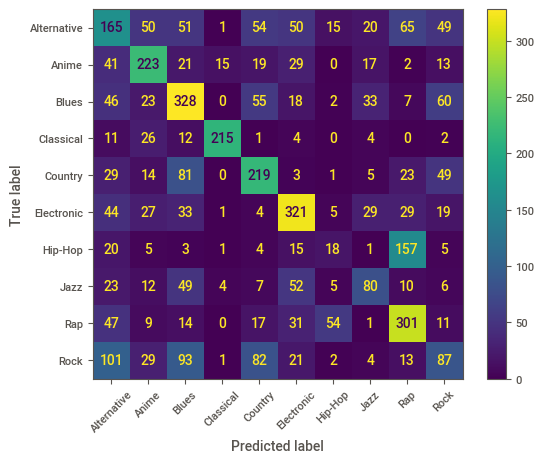

In [91]:
# Decode the class labels back to their original form using the label encoder
decoded_classes = label_encoder.inverse_transform(best_model.classes_)

# Generate the confusion matrix for the best model using the test data
cm = get_confusion_matrix(best_model, cat_test_pool)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decoded_classes)

# Plot the confusion matrix
disp.plot(values_format=".0f", xticks_rotation=45)
plt.show()

The model most frequently misclassifies the 'Hip-Hop' class, labeling it as 'Rap'. The model performs best at identifying classical music.

Let's evaluate the performance of the best model on the entire training dataset using 5-fold cross-validation.

In [92]:
data_cat =data_preparation(data, x_cat, df_train)
data_cat.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,duration_score,track_name
instance_id,,,,,,,,,,,,,,,
25143,0.48,0.67,"182,653.00",0.35,0.02,D,0.12,-16.84,Major,0.05,101.38,0.45,Country,3,Highwayman
26091,0.24,0.45,"187,133.00",0.67,0.00,A,0.11,-8.39,Minor,0.04,113.07,0.54,Rock,3,Toes Across The Floor
87888,0.23,0.45,"173,448.00",0.80,0.00,E,0.18,-5.22,Minor,0.37,80.98,0.34,Alternative,2,First Person on Earth
77021,0.06,0.85,"255,987.00",0.87,0.00,G#,0.32,-4.80,Minor,0.08,116.01,0.97,Hip-Hop,4,No Te Veo - Digital Single
20852,0.23,0.74,"195,333.00",0.57,0.00,C,0.18,-5.55,Major,0.05,76.49,0.58,Alternative,3,Chasing Shadows


In [93]:
x_all = data_cat.columns.difference(['music_genre', 'duration_ms'])

In [94]:
full_train_pool = Pool(
    data=data_cat[x_all],
    label=data_cat[y],
    cat_features=x_cat,
    text_features=['track_name']
)

In [95]:
params = best_model.get_params()

In [96]:
cv_data_final = cv(
    params = params,
    pool = full_train_pool,
    fold_count=5,
    plot=True,
    stratified=True,
    verbose=250
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.3596836	test: 0.3557951	best: 0.3557951 (0)	total: 63.9ms	remaining: 1m 3s
250:	learn: 0.5240402	test: 0.4959569	best: 0.4971821 (246)	total: 11.4s	remaining: 34s
500:	learn: 0.5603459	test: 0.5106592	best: 0.5123744 (461)	total: 22.9s	remaining: 22.8s
750:	learn: 0.5939531	test: 0.5121294	best: 0.5148248 (709)	total: 34.4s	remaining: 11.4s
999:	learn: 0.6223476	test: 0.5126195	best: 0.5148248 (709)	total: 45.7s	remaining: 0us
bestTest = 0.5148247978
bestIteration = 709
Training on fold [1/5]
0:	learn: 0.3506868	test: 0.3361118	best: 0.3361118 (0)	total: 52.2ms	remaining: 52.1s
250:	learn: 0.5297400	test: 0.4873744	best: 0.4893356 (211)	total: 11.9s	remaining: 35.4s
500:	learn: 0.5687393	test: 0.4976710	best: 0.4998774 (462)	total: 23.4s	remaining: 23.3s
750:	learn: 0.5962718	test: 0.4996323	best: 0.5011032 (644)	total: 34.8s	remaining: 11.5s
999:	learn: 0.6238043	test: 0.5018387	best: 0.5020838 (993)	total: 45.9s	remaining: 0us
bestTest = 0.502083844

In [97]:
scores_final = cv_data_final.loc[
    cv_data_final['test-TotalF1:average=Micro-mean'] == cv_data_final['test-TotalF1:average=Micro-mean'].max()
]
scores_final

,iterations,test-TotalF1:average=Micro-mean,test-TotalF1:average=Micro-std,train-TotalF1:average=Micro-mean,train-TotalF1:average=Micro-std,test-MultiClass-mean,test-MultiClass-std,train-MultiClass-mean,train-MultiClass-std
734,734,0.51,0.01,0.59,0.00,1.33,0.02,1.14,0.00


In [98]:
scores_final = scores_final["test-TotalF1:average=Micro-mean"].values[0]
print(f'Best mean f1_micro = {scores_final:.2f}')

Best mean f1_micro = 0.51


**Conclusions:**

* The model most frequently misclassifies the 'Hip-Hop' genre as 'Rap'.

* The model performs best at identifying the 'Classical' genre.

* Evaluating the performance of the CatBoostClassifier model on the entire training dataset using 5-fold cross-validation resulted in an f1_micro score of 0.51.

## Feature Importance Analysis.

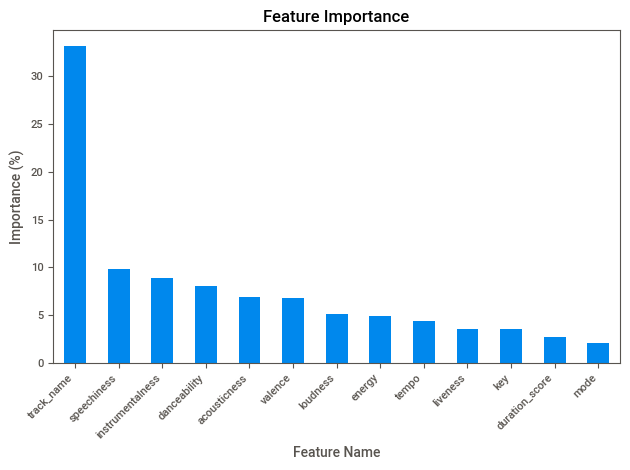

In [99]:
# Get the feature importances from the best model using the test data pool
feature_importances = best_model.get_feature_importance(cat_test_pool)

# Create a pandas Series for feature importances with feature names as the index
feature_importances_series = pd.Series(feature_importances, index=x_test_cat.columns)

# Sort the feature importances in descending order and plot as a bar chart
feature_importances_series.sort_values(ascending=False).plot.bar()

plt.title("Feature Importance")
plt.ylabel("Importance (%)")
plt.xlabel("Feature Name")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Conclusions:**

* The most important feature for the CatBoostClassifier model in determining the music genre is the track name.

* The least important feature is the base key of the track.

## Running the Best Model on Test Data.

### Training the best model on the entire training dataset.

In [100]:
best_model.fit(full_train_pool)

Hyperparameters of the best model.

In [101]:
best_model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'TotalF1:average=Micro',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_si

### Predictions on the test dataset.

In [102]:
df_test['duration_score'] = df_test['duration_ms'].apply(duration_group_score)
df_test.head()

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,duration_score
instance_id,,,,,,,,,,,,,,,
48564,Low Class Conspiracy,0.30,0.76,"146,213.00",0.68,0.00,A#,0.30,-7.14,Minor,0.36,90.36,4-Apr,0.90,2
72394,The Hunter,0.54,0.26,"240,360.00",0.52,0.01,G#,0.08,-5.17,Major,0.03,78.39,4-Apr,0.32,4
88081,Hate Me Now,0.01,0.68,"284,000.00",0.77,0.00,A,0.11,-4.40,Minor,0.22,90.00,4-Apr,0.41,4
78331,Somebody Ain't You,0.02,0.59,"177,354.00",0.75,0.00,B,0.12,-4.60,Major,0.05,160.05,4-Apr,0.61,2
72636,Sour Mango,0.00,0.42,-1.00,0.45,0.01,D,0.04,-8.83,Major,0.20,73.83,4-Apr,0.12,0


In [103]:
df_test[x_cat] = df_test[x_cat].fillna(' ')

In [104]:
test_pool = Pool(
    data=df_test[x_all],
    cat_features=x_cat,
    text_features=['track_name']
)

In [105]:
predictions = best_model.predict(test_pool).ravel()

### Creating a submission file for upload to the Kaggle.com platform

In [106]:
predictions

array(['Rap', 'Blues', 'Rap', ..., 'Rap', 'Electronic', 'Jazz'],
      dtype=object)

In [107]:
df_test['music_genre'] = predictions
df_test.head()

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,duration_score,music_genre
instance_id,,,,,,,,,,,,,,,,
48564,Low Class Conspiracy,0.30,0.76,"146,213.00",0.68,0.00,A#,0.30,-7.14,Minor,0.36,90.36,4-Apr,0.90,2,Rap
72394,The Hunter,0.54,0.26,"240,360.00",0.52,0.01,G#,0.08,-5.17,Major,0.03,78.39,4-Apr,0.32,4,Blues
88081,Hate Me Now,0.01,0.68,"284,000.00",0.77,0.00,A,0.11,-4.40,Minor,0.22,90.00,4-Apr,0.41,4,Rap
78331,Somebody Ain't You,0.02,0.59,"177,354.00",0.75,0.00,B,0.12,-4.60,Major,0.05,160.05,4-Apr,0.61,2,Country
72636,Sour Mango,0.00,0.42,-1.00,0.45,0.01,D,0.04,-8.83,Major,0.20,73.83,4-Apr,0.12,0,Alternative


In [108]:
submission = df_test['music_genre']
submission.head()

instance_id
48564            Rap
72394          Blues
88081            Rap
78331        Country
72636    Alternative
Name: music_genre, dtype: object

In [109]:
submission.to_csv('submission.csv')

## General Conclusions.

In this project music characteristics were analyzed in order to identify patterns for genre classification.

The data provided for analysis consists of two sets: a training set and a test set. The test set does not contain any targets.

During the preprocessing stage, missing values, outliers, and duplicates were discovered. Missing values were handled during the machine learning model development phase within the pipeline using the IterativeImputer method from the Sklearn library. For the CatBoost model, missing values in categorical features were filled with a space, while numerical missing values were left unprocessed. Outliers were managed by grouping the data during the features engineering stage. Duplicates were removed.

It was established that the data consists of 11 numerical features, 3 categorical features and 1 text feature. The distribution characteristics of the numerical features in both sets are identical. The target feature consists of 10 classes, with a class imbalance. The most frequent value is Blues, while the least frequent is Hip-hop.

During the exploratory data analysis using the Phik library, 3 pairs of highly correlated features were identified. Additionally, 5 features were identified as having the most significant impact on the target. Based on these features, distinctive characteristics of the genres were formulated.

The features were selected and categorized. The training data set was divided into training and testing subsets. The target was encoded using a technique from the Scikit-learn library.

To achieve the project goals, four models of multiclass classification were trained:

* Logistic Regression
* K-Nearest Neighbors
* Random Forest
* CatBoostClassifier

The metric used to assess the performance of the model is the F1 score, calculated with micro averaging.

Within the Sklearn pipeline, numerical features were scaled (StandardScaler was used for normally distributed features, and PowerTransformer for skewed distributions). Categorical features were encoded using One-Hot Encoding. For the CatBoostClassifier model, features were neither encoded nor scaled, but the text feature was included since this model can handle text.

Based on 5-fold cross-validation results, the CatBoostClassifier model was identified as the best model (F1 micro = 0.51).

Hyperparameter tuning using methods from the Optuna library did not lead to an improvement in the quality metric.

The performance of the CatBoostClassifier model was evaluated on the test subset and then on the entire training dataset using cross-validation. The results showed that the model performed best at identifying classical music and made the most errors on the rarest class, Hip-hop, labeling it as Rap.

The analysis of feature importance revealed that the track title was the most significant feature. This explains the superior performance of the CatBoostClassifier model, as other models did not have this feature due to a lack of integrated text processing tools.

To improve the performance, the model was retrained on the entire training dataset before making predictions on the test set.

The F1 micro score computed on 50% of the final predictions is 0.50725.

Overall, the use of the selected model will allow the "MiFaSol" service to improve the accuracy of personalized recommendations. This, in turn, may increase user satisfaction and enrich their musical experience.